# Amazon Copurchased

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

In [1]:
import time
started_at = time.time()
print started_at

1549330753.84


## Condições do experimento

* Quantidade limitada de arestas
* Todas as features
* Quantidade variável de n_estimators

## Parameters

We use the parameter below to set the maximum number of edges to be read from the CSV containing edges (links).

In [2]:
max_edges = 160000 # Set quantity to read from file
edges_csv_file = "data/20180812_links"
nodes_csv_file = "data/20180812_nodes"
n_estimators = 20
features = 'all'

In [3]:
# Parameters
n_estimators = 40
max_edges = 10000
features = "all"


## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [4]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML

## Read graph

### Read only first lines of datafile

Due to slowness in calculating centrality measures, we use the parameter provided in the beggining of the script to limit the number of edges we will read.

In [5]:
G = shared_functions.read_G(edges_csv_file, max_edges)

Using 10000 edges out of 229338 available (4.36% of data)


### Calculate nodes centrality measures

Now that we have our NetworkX graph, let's calculate some centrality measures for every node.

In [6]:
centrality_measures = shared_functions.centrality_measures(G)
print centrality_measures.keys()

['eigenvector_centrality', 'degree', 'betweenness_centrality']


### Load node properties

Let's load the CSV containing the nodes data (title, price) into a Pandas dataframe, and append the centrality measures calculated above.

In [7]:
df = pd.read_csv(nodes_csv_file)

####  Convert ID to random int to avoid leaking knowledge

In [8]:
df = shared_functions.add_sha256_column_from_id(df)

#### Add centrality measures

In [9]:
df = shared_functions.merge_columns(df, centrality_measures)

### Let's convert some fields to numeric

In [10]:
if features == 'all':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'degree',
        'eigenvector_centrality',
        'betweenness_centrality',
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]
    
elif features == 'all_except_network_metrics':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]

elif features == 'none':
    
    categorical_features = []

    numeric_features = []

df = shared_functions.prepare_data(df, numeric_features)

### Remove nodes without price

In [11]:
df = df.drop(df[df["price"].isnull()].index)

### Inspect columns

In [12]:
df.columns

Index([u'id', u'title', u'url', u'authors', u'coverType', u'publisher',
       u'edition', u'publicationDate', u'rankingCategory', u'category1',
       u'category2', u'category3', u'category4', u'category5', u'category6',
       u'category7', u'category8', u'category9', u'category10', u'isbn10',
       u'isbn13', u'language', u'postProcessed', u'price', u'ranking',
       u'pages', u'reviewCount', u'rating', u'width', u'height', u'depth',
       u'weight', u'sha256_id', u'eigenvector_centrality', u'degree',
       u'betweenness_centrality'],
      dtype='object')

### Features summary

Below we have a summary of the Pandas dataframe. We can see the number of nodes that we are actually analyzing, which depends on the max_edges parameter defined before.

In [13]:
pd.set_option('display.max_columns', None)
df.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
count,1887.000000,1887,1887,1887,1872,1874,0.0,273,1662,1637,1637,1365,814,461,117,9,0.0,0.0,0.0,1876,1876,1876,1887.0,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1.887000e+03,1.887000e+03,1887.000000,1887.000000
unique,NaN,1840,1887,1466,7,288,NaN,243,1,1,23,112,185,120,42,5,NaN,NaN,NaN,1876,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Macroeconomia,https://www.amazon.com.br/dp/0198769865/,Ian Stewart (Autor),Capa comum,Companhia das Letras,NaN,17 de outubro de 2017,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Faculdade,Probabilidade e Estatística,Abstrata,NaN,NaN,NaN,8521631030,978-8590200215,Português,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,1,12,1508,98,NaN,3,1662,1637,399,283,136,41,14,3,NaN,NaN,NaN,1,1,1263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1643.043985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,148.906746,58197.556473,412.825546,13.727257,4.481211,15.993920,22.953013,2.305302,467.427140,2.108380e+09,8.119221e-03,9.182830,0.003910
std,1817.245542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,266.318411,74967.622490,269.695568,34.297497,0.496588,2.877004,2.804110,1.213144,209.671432,1.228140e+09,2.103019e-02,18.597254,0.010416
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.900000,7.000000,4.000000,1.000000,1.000000,2.600000,14.000000,0.200000,18.100000,9.916600e+05,8.902568e-08,1.000000,0.000000
25%,509.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,35.900000,11609.000000,232.000000,3.000000,4.484431,14.000000,21.000000,1.400000,340.000000,1.036745e+09,7.787527e-06,1.000000,0.000000
50%,1218.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,56.900000,36009.000000,352.000000,13.782918,4.484431,15.600000,22.900000,2.000000,470.363783,2.092333e+09,6.130131e-05,2.000000,0.000498
75%,1907.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,129.090000,60184.500000,528.000000,13.782918,4.700000,17.200000,24.100000,2.900000,581.000000,3.143779e+09,2.193281e-03,8.000000,0.003184


Below we can inspect the first rows of data, containing title, price, degree and other centrality measures.

In [14]:
df.head(10)

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
0,1,The Stanford Mathematics Problem Book: With Hi...,https://www.amazon.com.br/dp/0486469247/,"George Polya (Autor),",Capa comum,Dover Publications,NaN,19 de fevereiro de 2009,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0486469247,978-0486469249,Inglês,1,26.25,59183.0,68.0,1.000000,4.000000,14.0,21.0,0.6,181.0,3564330554,0.014272,19,0.018594
1,2,Fourier Series,https://www.amazon.com.br/dp/0486633179/,"Georgi P. Tolstov (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1976,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486633179,978-0486633176,Inglês,1,50.37,56112.0,352.0,3.000000,4.600000,14.6,21.0,1.9,363.0,1309098117,0.060501,62,0.009579
2,3,Probability Theory: A Concise Course,https://www.amazon.com.br/dp/0486635449/,"Y. A. Rozanov (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486635449,978-0486635446,Inglês,1,29.23,44345.0,160.0,13.782918,4.484431,14.4,20.8,0.8,200.0,1260550007,0.041809,59,0.038763
3,4,"Vectors, Tensors and the Basic Equations of Fl...",https://www.amazon.com.br/dp/0486661105/,"Rutherford Aris (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Mecânica,Hidráulica,NaN,NaN,NaN,NaN,0486661105,978-0486661100,Inglês,1,48.79,82275.0,320.0,2.000000,4.500000,13.7,21.5,1.6,381.0,4012708477,0.013503,18,0.010456
4,5,Ordinary Differential Equations,https://www.amazon.com.br/dp/0486649407/,"Morris Tenenbaum (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486649407,978-0486649405,Inglês,1,71.63,40840.0,848.0,4.000000,4.500000,13.8,21.8,4.0,939.0,3891707921,0.084038,88,0.021730
5,6,The Variational Principles of Mechanics,https://www.amazon.com.br/dp/0486650677/,"Cornelius Lanczos (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486650677,978-0486650678,Inglês,1,88.15,36960.0,418.0,1.000000,5.000000,13.8,21.5,2.2,581.0,2030201243,0.051176,43,0.017458
6,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,13.782918,4.484431,13.7,21.5,0.8,159.0,744636978,0.010229,9,0.001426
7,8,Thermodynamics and the Kinetic Theory of Gases...,https://www.amazon.com.br/dp/0486414612/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,18 de outubro de 2010,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486414612,978-0486414614,Inglês,1,26.01,24406.0,160.0,2.000000,5.000000,13.8,21.6,1.0,159.0,425205287,0.005257,10,0.017771
8,9,Mechanics,https://www.amazon.com.br/dp/0486607542/,"Jacob P. Den Hartog (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1961,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486607542,978-0486607542,Inglês,1,50.96,90609.0,480.0,13.782918,4.484431,13.6,20.3,2.3,522.0,1246026773,0.022270,23,0.005219
9,10,Statistical Thermodynamics,https://www.amazon.com.br/dp/0486661016/,"Erwin Schrodinger (Autor),",Capa comum,Dover Publications,NaN,NaN,Liv

## Random forest using various features, price as target

### Preparing data

In [15]:
target, features, feature_list, test_features, test_target = shared_functions.prepare_datasets(df, numeric_features, categorical_features, 'price')

Numeric features:  ['degree', 'eigenvector_centrality', 'betweenness_centrality', 'ranking', 'reviewCount', 'pages', 'weight', 'height', 'width', 'depth', 'rating']
Categorical features:  ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'language', 'coverType', 'publisher', 'rankingCategory', 'authors']
Target column:  price
Test percentage:  0.199788023317
Train features shape:  (1510, 2253)
Train target shape:  (1510,)
Test features shape:  (377, 2253)
Test target shape:  (377,)


### Average price and median price as baselines

It's important to have a baseline, so we can validate our predictions after running our model. One easy choice for baseline is the average price of a book.

We have an average price around R\$43, so this means that a very easy prediction would be to always guess R$43 for the price of any book.

In [16]:
average_target = np.average(target)
median_target = np.median(target)
print "Average price: R$", average_target
print "Median parice; R$", median_target

Average price: R$ 143.6095761589404
Median parice; R$ 55.155


### Cross val

#### Run cross val

In [17]:
estimators, splits, scores = shared_functions.run_cross_validation_regression(features, target, n_estimators)

#### Cross val score

In [18]:
shared_functions.print_score_summary(scores)

=== Relative
RF relative abs mean:  0.4131652351381449
RF relative abs std:  0.03839271943677751
Baseline (average) relative mean:  2.3014062784051483
Baseline (average) relative std:  0.16912211036172503
Baseline (median) relative mean:  0.7170353036124263
Baseline (median) relative std:  0.04408862248005469
=== Absolute
RF abs mean:  58.71045927152318
RF abs std:  12.445913418189512
Baseline (average) mean:  141.071986579536
Baseline (average) std:  19.58527742533005
Baseline (median) mean:  109.33903311258277
Baseline (median) std:  21.339691635263947


####  List of most important features

In [19]:
shared_functions.get_most_important_features(estimators, feature_list)

,feature,mean importance,std,std/mean
0,coverType_Capa dura,22.513458,1.781079,0.079112
1,eigenvector_centrality,9.915763,2.380214,0.240043
2,pages,9.787361,1.249102,0.127624
3,publisher_McGraw-Hill Science/Engineering/Math,7.501588,2.510445,0.334655
4,ranking,6.555642,1.669800,0.254712
5,width,6.541081,1.037579,0.158625
6,publisher_Cengage Learning,6.024491,2.128246,0.353266
7,depth,2.613906,0.304784,0.116601
8,height,2.607915,0.467107,0.179111
9,betweenness_centrality,1.839191,0.472374,0.256838


### Predicted price vs real price

Splits quantity:  10
Splits lenghts:  [151, 151, 151, 151, 151, 151, 151, 151, 151, 151]
X shape:  (1510, 2253)
y shape:  (1510,)


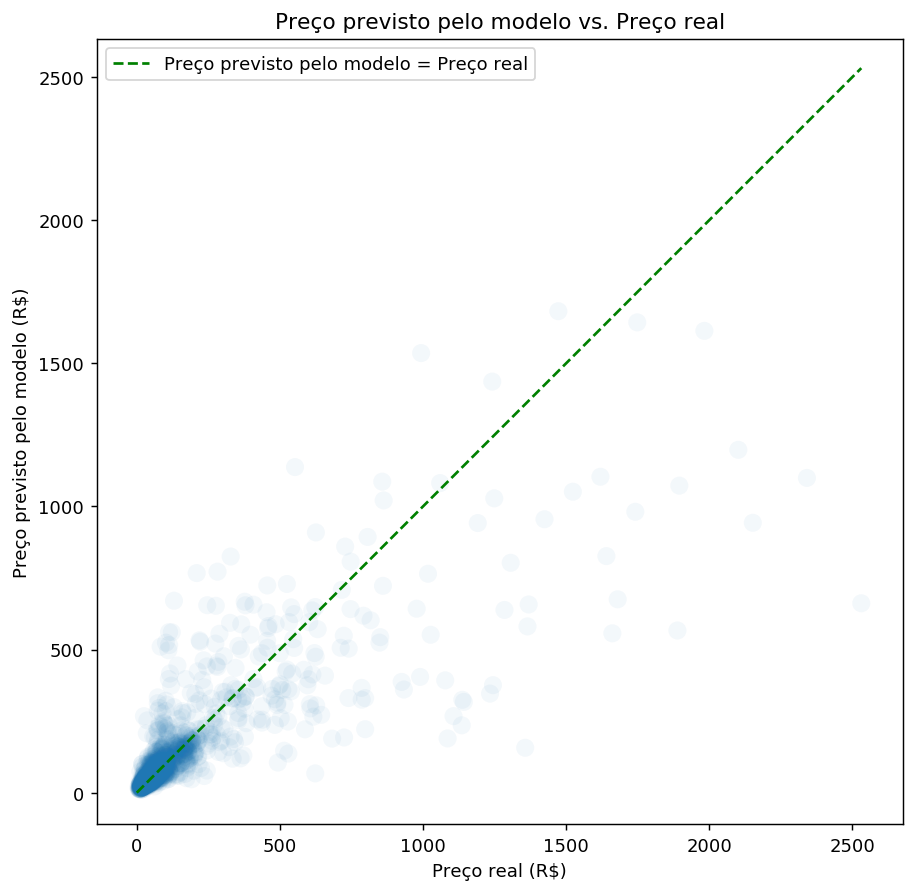

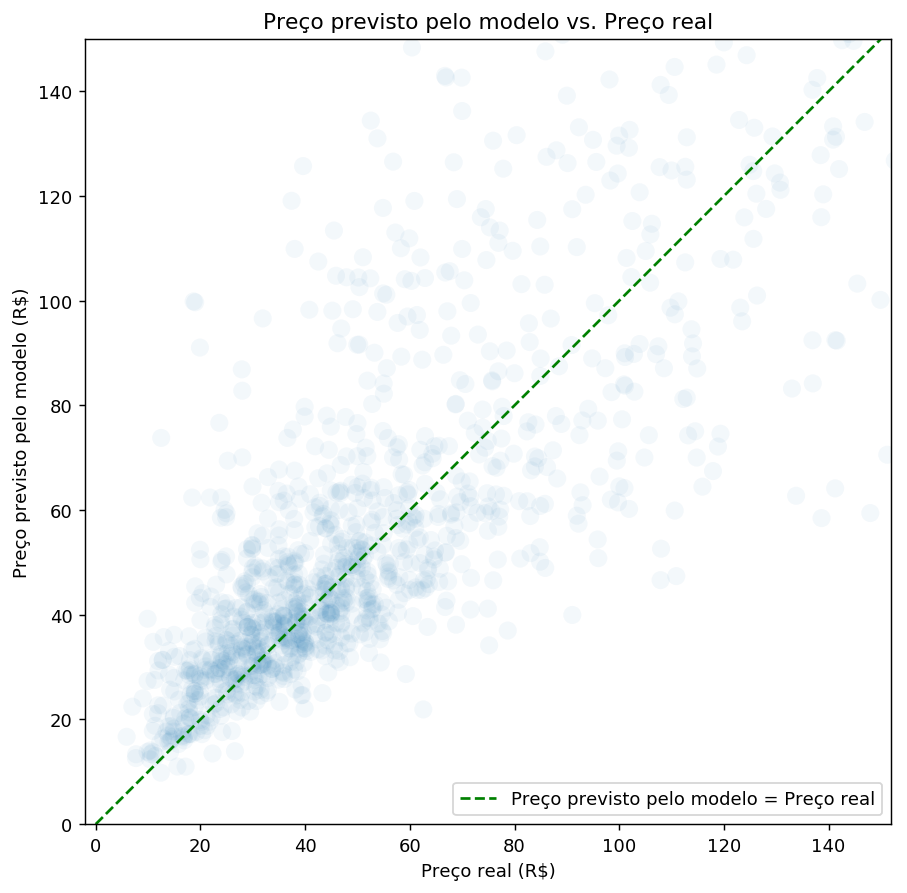

In [20]:
y_pred = shared_functions.get_all_predictions_from_splits(features, target, splits, estimators)                                                  
shared_functions.plot_splits_predicted_vs_real(target, y_pred, title=u'Preço previsto pelo modelo vs. Preço real', xlabel=u'Preço real (R$)', ylabel=u'Preço previsto pelo modelo (R$)', legend=u'Preço previsto pelo modelo = Preço real', zoomY = 150)

### Mean absolute error

Now we can compare the errors obtained by our predictions against the errors provided by the baseline (average price). Our prediction errors should be less than the baseline errors to consider the model successful.

In [21]:
errors, errors_baseline, errors_relative, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative = shared_functions.print_mean_absolute_error(y_pred, target, average_target, median_target)

== Absolute
('Mean absolute prediction error: R$', 58.71)
('Std prediction error: R$', 143.51)
('Mean absolute error using average: R$', 141.07)
('Std prediction error using average: R$', 220.71)
('Mean absolute error using median: R$', 109.34)
('Std prediction error using median: R$', 253.93)
== Relative
('Mean relative absolute prediction error: ', 0.41)
('Std relative prediction error: ', 0.61)
('Mean relative absolute error using average: ', 2.3)
('Std relative prediction error using average: ', 2.47)
('Mean absolute error using median: R$', 0.72)
('Std prediction error using median: R$', 0.75)


### Join data

In [22]:
pd.set_option('display.max_columns', None)
predicted_df, joined_predicted_df = shared_functions.join_predicted_df(df, features, target, y_pred, errors, errors_relative, errors_baseline, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative)

### Worst absolute predictions

Below we can inspect the rows with the biggest prediction error.

In [23]:
joined_predicted_df.sort_values('error', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.565469e+08,"[456546893.0, 13.0, 0.0249982911487, 0.0018255...",1869.39475,2387.460424,2475.915,0.978209,0.943261,0.738579,661.67525,2531.07,1685,Complex Analysis Complex Analysis Complex Anal...,https://www.amazon.com.br/dp/0070006571/,"Lars V. Ahlfors (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070006571,978-0070006577,Inglês,1,2531.07,59185.844728,345.000000,13.782918,4.484431,16.000000,23.100000,2.50000,470.363783,0.024998,13,0.001826
9.158984e+07,"[91589843.0, 12.0, 0.0220459396529, 0.00180494...",1322.21100,1745.150424,1833.605,0.970798,0.923966,0.700042,566.54900,1888.76,1712,Vector Calculus,https://www.amazon.com.br/dp/1429215089/,"Jerrold E. Marsden (Autor),",Capa dura,W.H. Freeman & Company,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Análise Vetorial,NaN,NaN,NaN,NaN,1429215089,978-1429215084,Inglês,1,1888.76,311760.000000,545.000000,13.782918,4.484431,21.000000,26.000000,3.20000,470.363783,0.022046,12,0.001805
1.731114e+09,"[1731113829.0, 13.0, 0.0296845571371, 0.005223...",1241.62925,2197.590424,2286.045,0.976442,0.938660,0.530339,1099.57075,2341.20,1779,Modern Physics for Scientists and Engineers,https://www.amazon.com.br/dp/1133103723/,"Stephen T. Thornton (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1133103723,978-1133103721,Inglês,1,2341.20,59185.844728,688.000000,13.782918,4.484431,20.300000,25.400000,3.20000,470.363783,0.029685,13,0.005224
7.945218e+08,"[794521798.0, 1.0, 0.00128028521964, 0.0, 5918...",1209.38100,2008.560424,2097.015,0.974372,0.933272,0.561936,942.78900,2152.17,2199,Introduction to Chemical Engineering Thermodyn...,https://www.amazon.com.br/dp/1259696529/,J.M. Smith Termodinamica en ingenieria quimica...,Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1259696529,978-1259696527,Inglês,1,2152.17,59185.844728,768.000000,13.782918,4.484431,18.500000,23.900000,3.30000,470.363783,0.001280,1,0.000000
1.993779e+09,"[1993779221.0, 24.0, 0.0344875756862, 0.003800...",1200.16300,1213.390424,1301.845,0.959355,0.894171,0.884424,156.83700,1357.00,1716,A VULVA 2 Ed 2003,https://www.amazon.com.br/dp/8126532289/,S. M. Neill C. M. Ridley (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8126532289,978-8126532285,Inglês,1,1357.00,59185.844728,420.386983,13.782918,4.484431,16.101266,23.044557,2.33357,470.363783,0.034488,24,0.003800
1.895458e+09,"[1895458154.0, 9.0, 0.0158713811553, 0.0015679...",1104.79700,1517.870424,1606.325,0.966804,0.913565,0.664948,556.68300,1661.48,1897,A Transition to Advanced Mathematics,https://www.amazon.com.br/dp/1285463269/,"Douglas Smith (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285463269,978-1285463261,Inglês,1,1661.48,59185.844728,448.000000,13.782918,4.484431,19.000000,23.500000,1.90000,748.000000,0.015871,9,0.001568
1.859584e+09,"[1859584463.0, 2.0, 0.00558357466987, 0.000873...",1004.52275,1536.480424,1624.935,0.967171,0.914523,0.597898,675.56725,1680.09,1918,Electric Machinery and Power System Fundamentals,https://www.amazon.com.br/dp/0072291354/,Stephen J. Chapman (Autor),Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0072291354,978-0072291353,Inglês,1,1680.09,59185.844728,696.000000,13.782918,4.484431,19.000000,23.400000,3.30000,470.363783,0.005584,2,0.000873
1

### Worst relative predictions

In [24]:
joined_predicted_df.sort_values('error_relative', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.381738e+09,"[2381737828.0, 34.0, 0.00423956673993, 0.01945...",242.29575,118.619576,30.165,1.207083,4.746682,9.695708,267.28575,24.99,207,Meus Últimos Anos. Os Escritos da Maturidade d...,https://www.amazon.com.br/dp/8520935419/,Albert Einstein (Autor),Capa dura,Nova Fronteira,NaN,NaN,Livros,Livros,Ciências,Física,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8520935419,978-8520935415,Português,1,24.99,4978.000000,272.000000,3.000000,5.000000,15.800000,23.600000,2.00000,540.000000,0.004240,34,0.019452
2.674498e+09,"[2674497925.0, 2.0, 0.000371902788702, 0.00011...",215.52300,106.599576,18.145,0.490273,2.880291,5.823372,252.53300,37.01,1484,Happiness,https://www.amazon.com.br/dp/0199590605/,Daniel M. Haybron (Autor),Capa comum,"Oxford University Press, USA",NaN,1 de outubro de 2013,Livros,Livros,Inglês e Outras Línguas,"Política, Filosofia e Ciências Sociais",Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,0199590605,978-0199590605,Inglês,1,37.01,426261.000000,149.000000,1.000000,5.000000,11.200000,16.800000,1.00000,118.000000,0.000372,2,0.000113
1.487078e+08,"[148707819.0, 10.0, 0.0222805394459, 0.0014267...",426.63575,60.169576,28.285,0.338986,0.721112,5.113084,510.07575,83.44,2252,Maker of Patterns – An Autobiography Through L...,https://www.amazon.com.br/dp/0871403862/,Freeman Dyson (Autor),Capa dura,Liveright,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0871403862,978-0871403865,Inglês,1,83.44,198305.000000,416.000000,1.000000,5.000000,16.800000,24.400000,3.60000,739.000000,0.022281,10,0.001427
2.576533e+09,"[2576533146.0, 1.0, 3.14715923438e-05, 0.0, 33...",172.35750,108.619576,20.165,0.576308,3.104303,4.925907,207.34750,34.99,2862,Explica Tudo. Coisas Difíceis em Palavras Fáceis,https://www.amazon.com.br/dp/8535929533/,Randall Munroe (Autor),Capa dura,Companhia das Letras,NaN,NaN,Livros,Livros,Ciências,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535929533,978-8535929539,Português,1,34.99,331.000000,68.000000,2.000000,4.000000,23.400000,33.600000,1.20000,680.000000,0.000031,1,0.000000
2.119500e+09,"[2119500354.0, 1.0, 3.06204401294e-05, 0.0, 55...",61.28150,131.109576,42.655,3.412400,10.488766,4.902520,73.78150,12.50,7183,Química,https://www.amazon.com.br/dp/8588749297/,Mark Jackson (Autor),Capa flexível,Barros Fischer & Associados,NaN,NaN,Livros,Livros,Ciências,Química,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8588749297,978-8588749290,Português,1,12.50,55234.000000,4.000000,13.782918,4.484431,20.000000,27.000000,0.40000,299.000000,0.000031,1,0.000000
9.535769e+08,"[953576854.0, 69.0, 0.00185246756675, 0.030450...",81.16175,124.909576,36.455,1.949465,6.679656,4.340201,99.86175,18.70,129,50 Ideias de Física Quântica,https://www.amazon.com.br/dp/8542206045/,Joanne Baker (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,18.70,59185.844728,420.386983,13.782918,4.484431,16.101266,23.044557,2.33357,470.363783,0.001852,69,0.030450
1.123179e+09,"[1123179230.0, 8.0, 0.000219834640277, 0.00168...",80.70425,124.619576,36.165,1.904423,6.562379,4.249829,99.69425,18.99,424,O Livro de Ouro do Universo,https://www.amazon.com.br/dp/8569809832/,Ronaldo Rogério de Freitas Mourão (Autor),Capa comum,HarperCollins Brasil,NaN,NaN,Livros,Livros,Ciências,Astronomia e Ciência Espacial,Astronomia,NaN,NaN,NaN,NaN,NaN,NaN,8569809832,978-8569809838,Português,1,18.99,2813.000000,528.000000,2.000000,4.000000,17.000000,23.800000,2.60000,780.000000,0.000220,8,0.001684
2.150499e+09,"[2150499263.0, 6.0, 0.0130063558535, 

### Best absolute predictions

In [25]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.707403e+09,"[2707402607.0, 1.0, 5.75263558773e-07, 0.0, 13...",0.00175,107.709576,19.255,0.536351,3.000267,0.000049,35.90175,35.90,736,Amostragem Probabilística. Um Curso Introdutór...,https://www.amazon.com.br/dp/8531415616/,Nilza Nunes da Silva (Autor),Capa comum,EDUSP,NaN,NaN,Livros,Livros,Ciências,Matemática,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8531415616,978-8531415616,Português,1,35.90,13909.0,136.0,13.782918,4.484431,16.6,22.8,0.6,259.000000,5.752636e-07,1,0.000000
1.109134e+09,"[1109133947.0, 4.0, 0.000143135619931, 0.00072...",0.00725,123.709576,35.255,1.771608,6.216562,0.000364,19.89275,19.90,577,A História do Mundo Para Quem Tem Pressa,https://www.amazon.com.br/dp/8565859517/,Emma Marriot (Autor),Capa comum,Valentina,NaN,NaN,Livros,Livros,História,Mundial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565859517,978-8565859516,Português,1,19.90,4698.0,200.0,157.000000,4.000000,14.0,20.8,1.2,358.000000,1.431356e-04,4,0.000723
1.752313e+09,"[1752313325.0, 1.0, 2.72232354309e-06, 0.0, 14...",0.02375,116.709576,28.255,1.050372,4.338646,0.000883,26.87625,26.90,1595,Genética Para Leigos,https://www.amazon.com.br/dp/8550800228/,Tara Rodden Robinson (Autor),Capa comum,Alta Books,NaN,NaN,Livros,Livros,Saúde e Família,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8550800228,978-8550800226,Português,1,26.90,14362.0,352.0,3.000000,4.400000,12.0,17.2,1.8,259.000000,2.722324e-06,1,0.000000
2.655629e+08,"[265562943.0, 12.0, 0.00047144694835, 0.009784...",0.03825,98.449576,9.995,0.221324,2.180017,0.000847,45.19825,45.16,108,Tolices Brilhantes,https://www.amazon.com.br/dp/8501404446/,"Mario Livio (Autor),",Capa comum,Record,NaN,NaN,Livros,Livros,Ciências,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8501404446,978-8501404442,Português,1,45.16,55631.0,350.0,2.000000,3.000000,15.6,22.8,2.2,440.000000,4.714469e-04,12,0.009785
3.021937e+09,"[3021937407.0, 1.0, 5.23207748418e-05, 0.0, 15...",0.03925,65.689576,22.765,0.292159,0.843039,0.000504,77.95925,77.92,1383,A Moeda e a Lei,https://www.amazon.com.br/dp/8537816949/,Gustavo H. B. Franco (Autor),Capa comum,Zahar,NaN,NaN,Livros,Livros,"Administração, Negócios e Economia",Economia,História Econômica,NaN,NaN,NaN,NaN,NaN,NaN,8537816949,978-8537816943,Português,1,77.92,15244.0,848.0,9.000000,4.600000,16.0,22.8,4.8,470.363783,5.232077e-05,1,0.000000
9.056347e+08,"[905634706.0, 1.0, 2.56409507387e-06, 0.0, 325...",0.05225,126.709576,38.255,2.263609,7.497608,0.003092,16.95225,16.90,1591,Amor de Perdição,https://www.amazon.com.br/dp/8572323406/,Camilo Castelo Branco (Autor),Capa comum,Martin Claret,NaN,NaN,Livros,Livros,Literatura e Ficção,Ficção,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8572323406,978-8572323406,Português,1,16.90,3258.0,180.0,13.782918,4.484431,11.6,18.2,1.2,159.000000,2.564095e-06,1,0.000000
1.906426e+09,"[1906425859.0, 21.0, 0.000551314851165, 0.0116...",0.05575,105.619576,17.165,0.451829,2.780194,0.001467,38.04575,37.99,280,A Matemática do Dia a Dia. Transforme o Medo d...,https://www.amazon.com.br/dp/8550801402/,Steven Strogatz (Autor),Capa comum,Alta Books,NaN,NaN,Livros,Livros,Ciências,Matemática,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8550801402,978-8550801407,Português,1,37.99,40880.0,256.0,10.000000,4.400000,16.0,22.8,2.0,358.000000,5.513149e-04,21,0.011639
1.230700e+09,"[1230700116.0, 1.0, 2.56707462129e-06, 0.0, 48...",0.08600,120.609576,32.155,1.398043,5.243895,0.003739,23.08600,23.00,1530,Terra Sonâmbula,https://www.amazon.com.br/dp/8535925813/,Mia Couto (Autor),Livro de bolso,Companhia das Letras,NaN,NaN,Livros,Livro

### Best relative predictions

In [26]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.707403e+09,"[2707402607.0, 1.0, 5.75263558773e-07, 0.0, 13...",0.00175,107.709576,19.255,0.536351,3.000267,0.000049,35.90175,35.90,736,Amostragem Probabilística. Um Curso Introdutór...,https://www.amazon.com.br/dp/8531415616/,Nilza Nunes da Silva (Autor),Capa comum,EDUSP,NaN,NaN,Livros,Livros,Ciências,Matemática,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8531415616,978-8531415616,Português,1,35.90,13909.0,136.0,13.782918,4.484431,16.6,22.8,0.6,259.000000,5.752636e-07,1,0.000000
1.109134e+09,"[1109133947.0, 4.0, 0.000143135619931, 0.00072...",0.00725,123.709576,35.255,1.771608,6.216562,0.000364,19.89275,19.90,577,A História do Mundo Para Quem Tem Pressa,https://www.amazon.com.br/dp/8565859517/,Emma Marriot (Autor),Capa comum,Valentina,NaN,NaN,Livros,Livros,História,Mundial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565859517,978-8565859516,Português,1,19.90,4698.0,200.0,157.000000,4.000000,14.0,20.8,1.2,358.000000,1.431356e-04,4,0.000723
1.752313e+09,"[1752313325.0, 1.0, 2.72232354309e-06, 0.0, 14...",0.02375,116.709576,28.255,1.050372,4.338646,0.000883,26.87625,26.90,1595,Genética Para Leigos,https://www.amazon.com.br/dp/8550800228/,Tara Rodden Robinson (Autor),Capa comum,Alta Books,NaN,NaN,Livros,Livros,Saúde e Família,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8550800228,978-8550800226,Português,1,26.90,14362.0,352.0,3.000000,4.400000,12.0,17.2,1.8,259.000000,2.722324e-06,1,0.000000
2.655629e+08,"[265562943.0, 12.0, 0.00047144694835, 0.009784...",0.03825,98.449576,9.995,0.221324,2.180017,0.000847,45.19825,45.16,108,Tolices Brilhantes,https://www.amazon.com.br/dp/8501404446/,"Mario Livio (Autor),",Capa comum,Record,NaN,NaN,Livros,Livros,Ciências,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8501404446,978-8501404442,Português,1,45.16,55631.0,350.0,2.000000,3.000000,15.6,22.8,2.2,440.000000,4.714469e-04,12,0.009785
3.021937e+09,"[3021937407.0, 1.0, 5.23207748418e-05, 0.0, 15...",0.03925,65.689576,22.765,0.292159,0.843039,0.000504,77.95925,77.92,1383,A Moeda e a Lei,https://www.amazon.com.br/dp/8537816949/,Gustavo H. B. Franco (Autor),Capa comum,Zahar,NaN,NaN,Livros,Livros,"Administração, Negócios e Economia",Economia,História Econômica,NaN,NaN,NaN,NaN,NaN,NaN,8537816949,978-8537816943,Português,1,77.92,15244.0,848.0,9.000000,4.600000,16.0,22.8,4.8,470.363783,5.232077e-05,1,0.000000
9.056347e+08,"[905634706.0, 1.0, 2.56409507387e-06, 0.0, 325...",0.05225,126.709576,38.255,2.263609,7.497608,0.003092,16.95225,16.90,1591,Amor de Perdição,https://www.amazon.com.br/dp/8572323406/,Camilo Castelo Branco (Autor),Capa comum,Martin Claret,NaN,NaN,Livros,Livros,Literatura e Ficção,Ficção,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8572323406,978-8572323406,Português,1,16.90,3258.0,180.0,13.782918,4.484431,11.6,18.2,1.2,159.000000,2.564095e-06,1,0.000000
1.906426e+09,"[1906425859.0, 21.0, 0.000551314851165, 0.0116...",0.05575,105.619576,17.165,0.451829,2.780194,0.001467,38.04575,37.99,280,A Matemática do Dia a Dia. Transforme o Medo d...,https://www.amazon.com.br/dp/8550801402/,Steven Strogatz (Autor),Capa comum,Alta Books,NaN,NaN,Livros,Livros,Ciências,Matemática,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8550801402,978-8550801407,Português,1,37.99,40880.0,256.0,10.000000,4.400000,16.0,22.8,2.0,358.000000,5.513149e-04,21,0.011639
1.230700e+09,"[1230700116.0, 1.0, 2.56707462129e-06, 0.0, 48...",0.08600,120.609576,32.155,1.398043,5.243895,0.003739,23.08600,23.00,1530,Terra Sonâmbula,https://www.amazon.com.br/dp/8535925813/,Mia Couto (Autor),Livro de bolso,Companhia das Letras,NaN,NaN,Livros,Livro

### Relative errors distribution

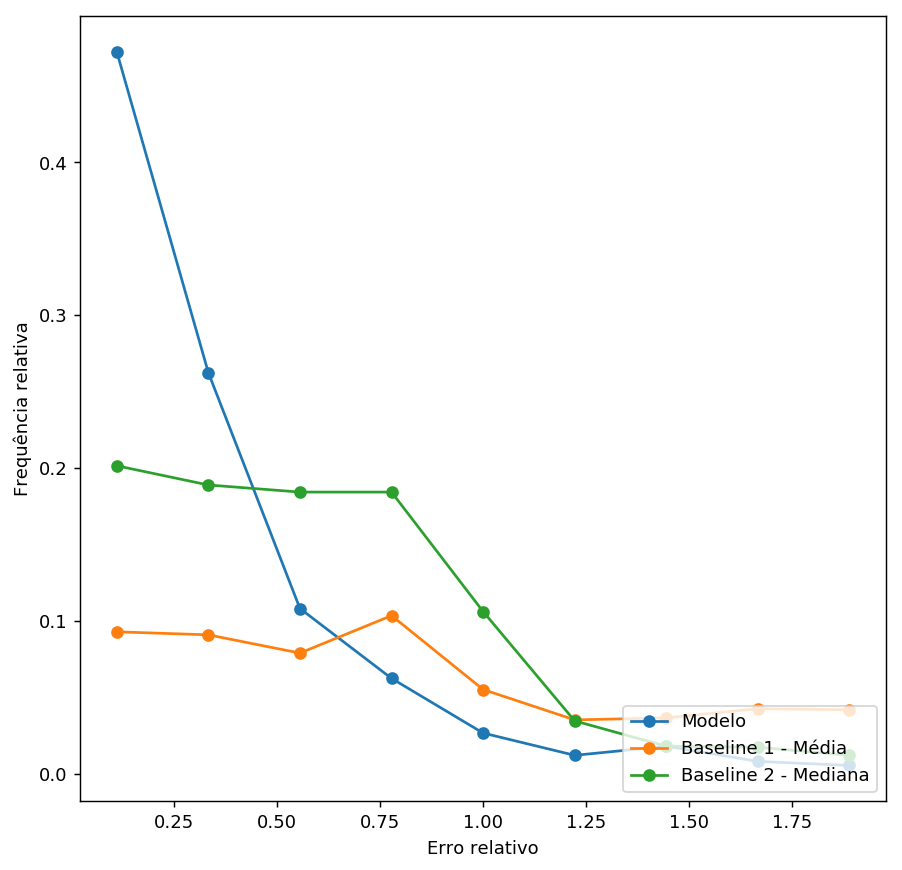

In [27]:
centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median = shared_functions.plot_relative_error_distribution(predicted_df)

#### Accumulated

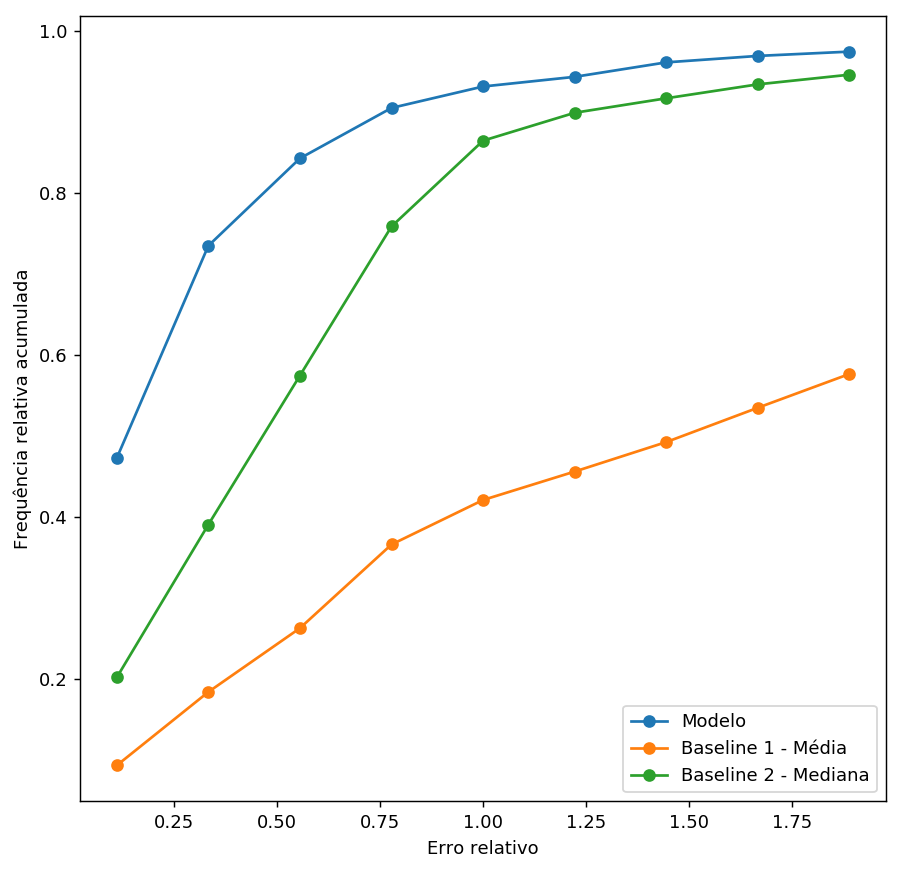

In [28]:
shared_functions.plot_accumulated_relative_error(centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median)

### Joined data summary

In [29]:
joined_predicted_df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,edition,category8,category9,category10,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,0.0,0.0,0.0,0.0,1510.0,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03,1510.000000,1510.000000
mean,58.710459,141.071987,109.339033,0.717035,2.301406,0.413165,130.708861,143.609576,1625.290728,NaN,NaN,NaN,NaN,1.0,143.609576,58313.231320,409.136594,14.201944,4.469469,15.898424,22.841532,2.283270,463.183660,8.159583e-03,9.292053,0.003955
std,143.555018,220.781054,254.018145,0.746418,2.466562,0.614749,187.693978,262.028181,1799.967823,NaN,NaN,NaN,NaN,0.0,262.028181,74496.440136,273.626158,37.536917,0.499613,2.835784,2.759598,1.207683,208.624890,2.099946e-02,18.595413,0.010241
min,0.001750,0.290424,0.115000,0.002081,0.002018,0.000049,9.824250,5.900000,1.000000,NaN,NaN,NaN,NaN,1.0,5.900000,7.000000,4.000000,1.000000,1.000000,2.600000,14.000000,0.200000,18.100000,8.902568e-08,1.000000,0.000000
25%,5.566875,69.485212,14.550000,0.264805,0.621903,0.107107,38.301938,34.900000,499.250000,NaN,NaN,NaN,NaN,1.0,34.900000,11643.750000,232.000000,3.000000,4.484431,13.800000,20.800000,1.400000,322.000000,9.068343e-06,1.000000,0.000000
50%,13.858500,99.709576,28.230000,0.570352,1.603757,0.243666,59.422375,55.155000,1215.500000,NaN,NaN,NaN,NaN,1.0,55.155000,36423.500000,350.000000,13.782918,4.484431,15.600000,22.800000,2.000000,470.363783,6.204331e-05,2.000000,0.000505
75%,41.211438,118.489576,68.235000,0.879661,3.114888,0.478404,134.140500,123.390000,1880.750000,NaN,NaN,NaN,NaN,1.0,123.390000,61048.500000,525.000000,13.782918,4.700000,17.000000,23.900000,2.800000,581.000000,2.104841e-03,9.000000,0.003262
85%,80.926175,128.692076,148.164000,0.993027,4.189335,0.691017,216.194612,203.319000,2212.650000,NaN,NaN,NaN,NaN,1.0,203.319000,94773.500000,640.000000,13.782918,5.000000,19.930000,25.800000,3.400000,699.000000,1.503504e-02,17.000000,0.006264
90%,149.812625,191.535424,279.990000,1.347021,5.111046,0.846838,324.508425,335.145000,3126.800000,NaN,NaN,NaN,NaN,1.0,335.145000,140448.500000,728.200000,14.000000,5.000000,20.600000,27.400000,3.800000,762.000000,2.999945e-02,25.100000,0.009600
95%,266.845125,460.167924,548.622500,2.074348,7.004820,1.418001,522.551837,603.777500,6522.650000,NaN,NaN,NaN,NaN,1.0,603.777500,225981.050000,892.400000,31.000000,5.000000,21.000000,27.800000,4.400000,880.000000,5.250390e-02,44.550000,0.020562


# Finished

In [30]:
finished_at = time.time()
duration = finished_at - started_at
print "Duração em segundos:"
print duration

Duração em segundos:
48.9470911026


<img src="files/image.png">